# Worksheet 08

Name:  Jialin Yu
UID: U41792151

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      1       |
| A  C |      0       |
| A  D |      0       |
| A  E |      0       |
| B  C |      1       |
| B  D |      0       |
| B  E |      0       |
| C  D |      0       |
| C  E |      0       |
| D  E |      1       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

n choose 2 = n*(n-1)/2

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |
    
 c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

9*8/2 = 36 

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

Cluster 1: (2*1/2 = 1

Cluster 2: (4*3/2 = 6 

Total aggreement will only be the agreement number from a cluster, so the maximum pair agree is 6

total disagreement: total arrange - total aggreement = 30

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

first find the total arrangement

then find the cluster with most points in x

then find the cluster with msot points in y

find the minimum, let say, z, in above two number\n
the result will be total arrangement - z(z-1)/2

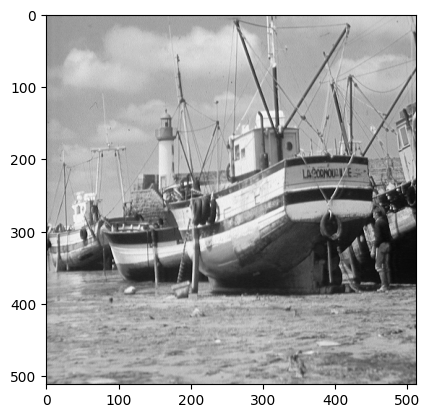

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

In [2]:
boat

array([[127., 123., 125., ..., 165., 169., 166.],
       [128., 126., 128., ..., 169., 163., 167.],
       [128., 124., 128., ..., 178., 160., 175.],
       ...,
       [112., 112., 115., ..., 101.,  97., 104.],
       [110., 112., 117., ..., 104.,  93., 105.],
       [113., 115., 121., ..., 102.,  95.,  97.]])

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

In [13]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
len(s)

512

Notice you can get the image back by multiplying the matrices back together:

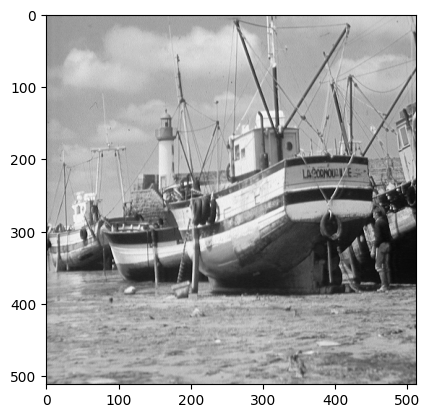

In [14]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [15]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

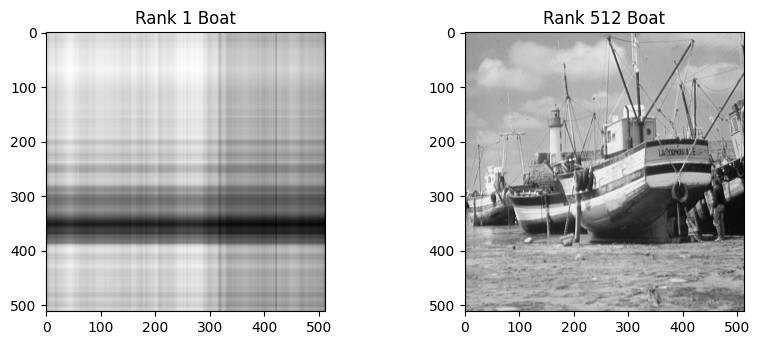

In [16]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

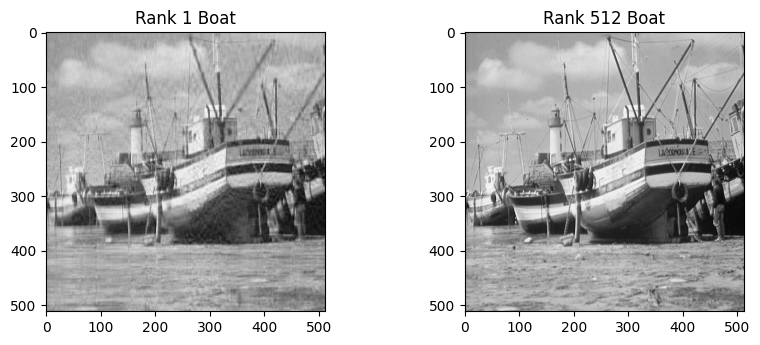

In [17]:
scopy = s.copy()
scopy[40:] = 0.0
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

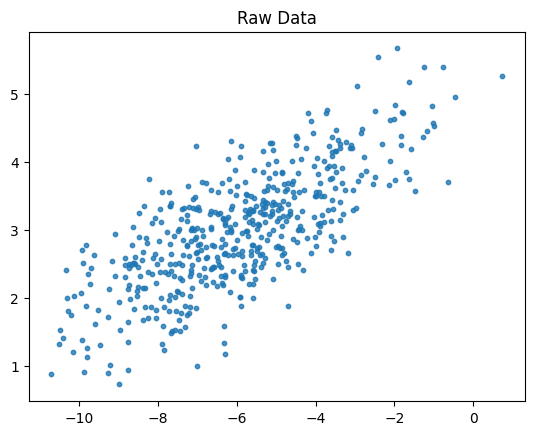

In [18]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

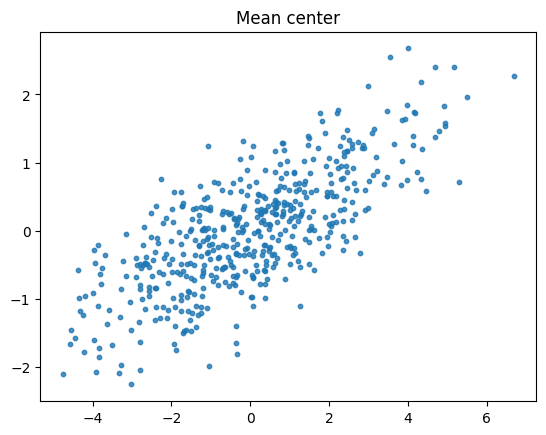

In [19]:
center_function = lambda x: x - x.mean()
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean center")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [20]:
u,s,vt=np.linalg.svd(X,full_matrices=False)
len(s)
#boat_copy = u.dot(np.diag(s)).dot(vt)

2

Because X has two vectors and we need 2 singular values to matltiply them

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

it will lie at y = 2x

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

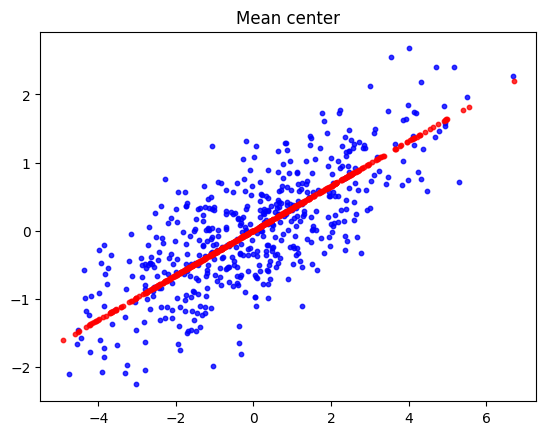

In [21]:
s2 = s.copy()
s2[1] = 0.0
temp = u.dot(np.diag(s2)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8, c = 'b')
plt.scatter(temp[:, 0], temp[:, 1], s=10, alpha=0.8, c = 'r')
plt.title("Mean center")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

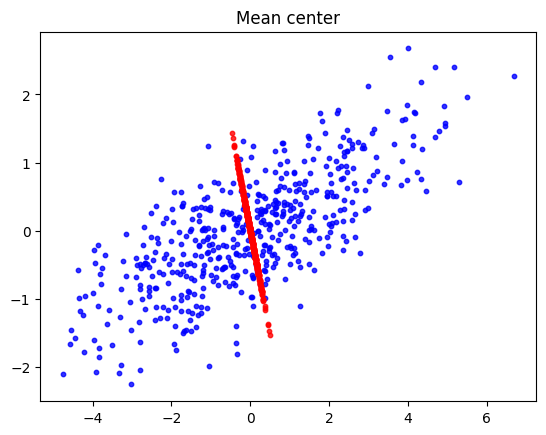

In [22]:
s2 = s.copy()
s2[0] = 0.0
temp = u.dot(np.diag(s2)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8, c = 'b')
plt.scatter(temp[:, 0], temp[:, 1], s=10, alpha=0.8, c = 'r')
plt.title("Mean center")
plt.show()

The line become further away from the cluster